In [1]:
import numpy as np
import pandas as pd

In [2]:
# crop = pd.read_csv("Crop_recommendation.csv")
crop = pd.read_excel("Crop.xlsx")
crop.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NITROGEN     2200 non-null   int64  
 1   PHOSPHORUS   2200 non-null   int64  
 2   POTASSIUM    2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   PH           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
CROP           0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df = pd.get_dummies(crop, columns=['CROP'], prefix=['Crop'])
df

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,Crop_apple,Crop_banana,Crop_blackgram,...,Crop_mango,Crop_mothbeans,Crop_mungbean,Crop_muskmelon,Crop_orange,Crop_papaya,Crop_pigeonpeas,Crop_pomegranate,Crop_rice,Crop_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
corr = df.corr()
corr


,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,Crop_apple,Crop_banana,Crop_blackgram,...,Crop_mango,Crop_mothbeans,Crop_mungbean,Crop_muskmelon,Crop_orange,Crop_papaya,Crop_pigeonpeas,Crop_pomegranate,Crop_rice,Crop_watermelon
NITROGEN,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.175903,0.293714,-0.062268,...,-0.180219,-0.172119,-0.174779,0.294246,-0.183116,-0.003972,-0.176316,-0.187313,0.173457,0.288925
PHOSPHORUS,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.535032,0.189559,0.093348,...,-0.173251,-0.035419,-0.040249,-0.235848,-0.243590,0.037633,0.095068,-0.229032,-0.038264,-0.240612
POTASSIUM,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.653928,0.008192,-0.124584,...,-0.078558,-0.120317,-0.121869,0.008321,-0.164361,0.008149,-0.120059,-0.034214,-0.035679,0.008925
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.128678,0.075887,0.187808,...,0.241060,0.111151,0.125412,0.131330,-0.122869,0.349470,0.091618,-0.162864,-0.083057,-0.001055
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.204423,0.087021,-0.062384,...,-0.209066,-0.179617,0.137430,0.204515,0.202823,0.205109,-0.229604,0.182777,0.105792,0.134101
PH,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.152240,-0.136946,0.187396,...,-0.198292,0.102006,0.071768,-0.031213,0.154401,0.076699,-0.190451,-0.011368,-0.012412,0.007417
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.036503,0.004620,-0.141304,...,-0.034787,-0.207571,-0.218671,-0.312850,0.027845,0.155541,0.182665,0.016143,0.527088,-0.209209
Crop_apple,-0.175903,0.535032,0.653928,-0.128678,0.204423,-0.152240,0.036503,1.000000,-0.047619,-0.047619,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Crop_banana,0.293714,0.189559,0.008192,0.075887,0.087021,-0.136946,0.004620,-0.047619,1.000000,-0.047619,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Crop_blackgram,-0.062268,0.093348,-0.124584,0.187808,-0.062384,0.187396,-0.141304,-0.047619,-0.047619,1.000000,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619


<AxesSubplot:>

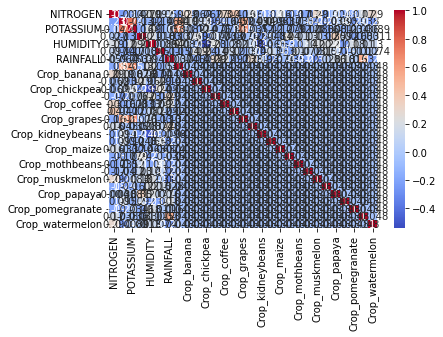

In [10]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [11]:
crop['CROP'].value_counts()

CROP
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

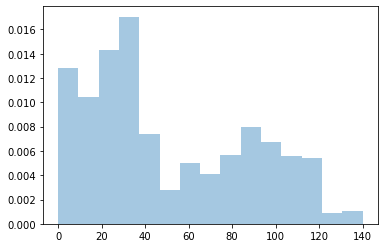

In [12]:
import matplotlib.pyplot as plt
sns.distplot(crop['NITROGEN'])
plt.show()

In [18]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['CROP'].map(crop_dict)

In [19]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [20]:
X = crop[['TEMPERATURE','HUMIDITY','NITROGEN','PHOSPHORUS','POTASSIUM','PH','RAINFALL']]
y = crop['crop_num']

In [21]:
X

,TEMPERATURE,HUMIDITY,NITROGEN,PHOSPHORUS,POTASSIUM,PH,RAINFALL
0,20.879744,82.002744,90,42,43,6.502985,202.935536
1,21.770462,80.319644,85,58,41,7.038096,226.655537
2,23.004459,82.320763,60,55,44,7.840207,263.964248
3,26.491096,80.158363,74,35,40,6.980401,242.864034
4,20.130175,81.604873,78,42,42,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,26.774637,66.413269,107,34,32,6.780064,177.774507
2196,27.417112,56.636362,99,15,27,6.086922,127.924610
2197,24.131797,67.225123,118,33,30,6.362608,173.322839
2198,26.272418,52.127394,117,32,34,6.758793,127.175293


In [22]:
y.shape

(2200,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(1760, 7)

In [26]:
X_test.shape

(440, 7)

In [27]:
X_train

,TEMPERATURE,HUMIDITY,NITROGEN,PHOSPHORUS,POTASSIUM,PH,RAINFALL
1656,16.396243,92.181519,17,16,14,6.625539,102.944161
752,27.543848,69.347863,37,79,19,7.143943,69.408782
892,27.521856,63.132153,7,73,25,7.288057,45.208411
1041,25.360592,75.031933,101,70,48,6.012697,116.553145
1179,35.474783,47.972305,0,17,30,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,21.213070,91.353492,10,5,5,7.817846,112.983436
1095,27.359116,84.546250,108,94,47,6.387431,90.812505
1130,27.920633,51.779659,11,36,31,6.475449,100.258567
1294,13.429886,80.066340,11,124,204,6.361141,71.400430


In [28]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [29]:
X_train

array([[0.21723408, 0.9089898 , 0.12142857, ..., 0.045     , 0.48532225,
        0.29685161],
       [0.53710965, 0.64257946, 0.26428571, ..., 0.07      , 0.56594073,
        0.17630752],
       [0.53647858, 0.57005802, 0.05      , ..., 0.1       , 0.58835229,
        0.08931844],
       ...,
       [0.54792131, 0.43760347, 0.07857143, ..., 0.13      , 0.46198144,
        0.28719815],
       [0.1321158 , 0.76763665, 0.07857143, ..., 0.995     , 0.44420505,
        0.18346657],
       [0.43458302, 0.56099735, 0.22857143, ..., 0.085     , 0.54465022,
        0.11879596]])

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-1.80469186e+00,  9.36586183e-01, -9.03426596e-01, ...,
        -6.68506601e-01,  1.93473784e-01,  5.14970176e-03],
       [ 3.85999989e-01, -1.00470485e-01, -3.67051340e-01, ...,
        -5.70589522e-01,  8.63917548e-01, -6.05290566e-01],
       [ 3.81678105e-01, -3.82774991e-01, -1.17161422e+00, ...,
        -4.53089028e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [ 4.60044471e-01, -8.98381379e-01, -1.06433917e+00, ...,
        -3.35588533e-01, -6.34357580e-04, -4.37358211e-02],
       [-2.38763079e+00,  3.86340190e-01, -1.06433917e+00, ...,
         3.05234239e+00, -1.48467347e-01, -5.69036842e-01],
       [-3.16161325e-01, -4.18045489e-01, -5.01145154e-01, ...,
        -5.11839275e-01,  6.86860180e-01, -8.96531475e-01]])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9590909090909091
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9840909090909091
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9204545454545454


In [33]:
rfc = ExtraTreeClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9272727272727272

In [34]:
def recommendation(temperature,humidity,nitro,phos,pota,ph,rain):
    features = np.array([[temperature,humidity,nitro,phos,pota,ph,rain]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [35]:
temperature = 20
humidity = 90
nitro=90
phos=50
pota=70
ph=5
rain=200

predict = recommendation(temperature,humidity,nitro,phos,pota,ph,rain)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
for i in predict:
    if predict[0] in crop_dict:
        crop = crop_dict[predict[0]]
        print("{} is a best crop to be cultivated ".format(crop))
    else:
        print("Sorry are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 


In [ ]:
dis=input()

if dis=="beed":
    temperature = 90
    humidity = 70
    nitro=17
    phos=30
    pota=40
    ph=50
    rain=60
    
else:
    print("no")

        
predict = recommendation(temperature,humidity,nitro,phos,pota,ph,rain)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
for i in predict:
    if predict[0] in crop_dict:
        crop = crop_dict[predict[0]]
        print("{} is a best crop to be cultivated ".format(crop))
    else:
        print("Sorry are not able to recommend a proper crop for this environment") 
        

In [ ]:
# # Sample recommendation function (replace with your own logic)
# def recommendation(temperature, humidity):
#     # Replace this logic with your recommendation algorithm
#     if temperature >= 30 and humidity >= 60:
#         return [1]  # Recommend Rice
#     elif temperature >= 25 and humidity >= 50:
#         return [2]  # Recommend Maize
#     else:
#         return []

# # Sample list of temperature and humidity values
# temperature_values = [40.0, 25.0, 20.0]
# humidity_values = [20, 60, 40]

# # Store the recommended crops for each set of values
# recommended_crops = []

# # Define the crop dictionary
# crop_dict = {
#     1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
#     8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
#     14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
#     19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
# }

# # Loop through the temperature and humidity values
# for temp, hum in zip(temperature_values, humidity_values):
#     predict = recommendation(temp, hum)
#     if predict and predict[0] in crop_dict:
#         crop = crop_dict[predict[0]]
#         recommended_crops.append(crop)
#     else:
#         recommended_crops.append("No Recommendation")

# # Print the recommended crops for each set of values
# for i, (temp, hum) in enumerate(zip(temperature_values, humidity_values)):
#     print(f"For Temperature: {temp}°C and Humidity: {hum}%, Recommended Crop is {recommended_crops[i]}")


In [36]:
# Sample recommendation function (replace with your own logic)
# def recommendation(temperature, humidity,nitro,phos,pota,ph,rain):
#     # Replace this logic with your recommendation algorithm
#     recommended_crops = []

#     if temperature >= 30 and humidity >= 60:
#         recommended_crops.append(1)  # Recommend Rice
#     if temperature >= 25 and humidity >= 50:
#         recommended_crops.append(2)  # Recommend Maize
#     if temperature >= 20 and humidity >= 40:
#         recommended_crops.append(3)  # Recommend Jute

#     return recommended_crops

# Sample temperature and humidity values
a=input()
temp = 20
hum = 90


if a=="beed":
    temperature=temp
    humidity=hum
    nitro=90
    phos=50
    pota=70
    ph=5
    rain=200
    
    # Get the list of recommended crops
    recommended_crops1 = recommendation(temperature, humidity,nitro,phos,pota,ph,rain)

# Define the crop dictionary
    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
        8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
        14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
        19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
    }

# Check if any recommended crops exist and print them
    if recommended_crops1:
        recommended_crop_names = [crop_dict[crop_id] for crop_id in recommended_crops1]
        print("Recommended crops to be cultivated:")
        for crop_name in recommended_crop_names:
            print(f"- {crop_name}")
    else:
        print("Sorry, we are not able to recommend a proper crop for this environment")

else:
    print("Sorry, we are not able to recommend a proper crop for this environment")
    

beed
Recommended crops to be cultivated:
- Papaya


In [61]:
# Sample recommendation function (replace with your own logic)
# def recommendation(temperature, humidity,nitro,phos,pota,ph,rain):
#     # Replace this logic with your recommendation algorithm
#     recommended_crops = []

#     if temperature >= 30 and humidity >= 60:
#         recommended_crops.append(1)  # Recommend Rice
#     if temperature >= 25 and humidity >= 50:
#         recommended_crops.append(2)  # Recommend Maize
#     if temperature >= 20 and humidity >= 40:
#         recommended_crops.append(3)  # Recommend Jute

#     return recommended_crops

# Sample temperature and humidity values
a=input()
temp = 20
hum = 90


if a=="beed":
    temperature=temp
    humidity=hum
    nitro=90
    phos=50
    pota=70
    ph=5
    rain=200
    
    # Get the list of recommended crops
    recommended_crops1 = recommendation(temperature, humidity,nitro,phos,pota,ph,rain)

# Define the crop dictionary
    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
        8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
        14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
        19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
    }

# Check if any recommended crops exist and print them
    if recommended_crops1:
        recommended_crop_names = [crop_dict[crop_id] for crop_id in recommended_crops1]
        print("Recommended crops to be cultivated:")
        
        mon=['Mango','Rice','Jute']
        wint=['Papaya']
        
        for crop_name in recommended_crop_names:
#             print(f"- {crop_name}")
#               if recommended_crop_names in mon:
#                 print(f"- {crop_name}")
                    x=crop_name
                    if x in mon:
                        print("-",x,"arey garami wala hai re ye")
                    elif x in wint:
                        print("-",x,"arrey thandi wala hai")
                        
                        



    else:
        print("Sorry, we are not able to recommend a proper crop for this environment")
        
        
else:
    print("Sorry, we are not able to recommend a proper crop for this environment")
    

KeyboardInterrupt: Interrupted by user

In [60]:
import requests
import json

# Replace 'YOUR_API_KEY' with your actual OpenWeatherMap API key
API_KEY = '32187bdcc880be018c7fc27cadbd1411'

# Replace 'YOUR_CITY' with the name of the city you want to get the weather forecast for
city = input()

# Make a request to the OpenWeatherMap API
url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = json.loads(response.text)

    # Extract and display the weather forecast for the next 5 days
    for day in data['list'][:5]:
        date = day['dt_txt']
        temperature = day['main']['temp']
        description = day['weather'][0]['description']
        print(f'Date: {date}, Temperature: {temperature}°C, Description: {description}')
else:
    print(f'Failed to retrieve weather data. Status code: {response.status_code}')
    
    
    
    
    
    
    
    
# Sample recommendation function (replace with your own logic)
# def recommendation(temperature, humidity,nitro,phos,pota,ph,rain):
#     # Replace this logic with your recommendation algorithm
#     recommended_crops = []

#     if temperature >= 30 and humidity >= 60:
#         recommended_crops.append(1)  # Recommend Rice
#     if temperature >= 25 and humidity >= 50:
#         recommended_crops.append(2)  # Recommend Maize
#     if temperature >= 20 and humidity >= 40:
#         recommended_crops.append(3)  # Recommend Jute

#     return recommended_crops

# Sample temperature and humidity values
# a=input()
# temp = 20
# hum = 90


if city=="beed":
    temperature=day['main']['temp']
    humidity=day['main']['humidity']
    nitro=90
    phos=50
    pota=70
    ph=5
    rain=200
    
    # Get the list of recommended crops
    recommended_crops1 = recommendation(temperature, humidity,nitro,phos,pota,ph,rain)

# Define the crop dictionary
    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
        8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
        14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
        19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
    }

# Check if any recommended crops exist and print them
    if recommended_crops1:
        recommended_crop_names = [crop_dict[crop_id] for crop_id in recommended_crops1]
        print("Recommended crops to be cultivated:")
        
        mon=['Mango','Rice','Jute']
        wint=['Papaya']
        
        for crop_name in recommended_crop_names:
#             print(f"- {crop_name}")
#               if recommended_crop_names in mon:
#                 print(f"- {crop_name}")
                    x=crop_name
                    if x in mon:
                        print("-",x,"arey garami wala hai re ye")
                    elif x in wint:
                        print("-",x,"arrey thandi wala hai")
                        
                        



    else:
        print("Sorry, we are not able to recommend a proper crop for this environment")
        
        
else:
    print("Sorry, we are not able to recommend a proper crop for this environment")
        


beed
Date: 2023-11-01 18:00:00, Temperature: 22.8°C, Description: few clouds
Date: 2023-11-01 21:00:00, Temperature: 21.21°C, Description: broken clouds
Date: 2023-11-02 00:00:00, Temperature: 19.34°C, Description: broken clouds
Date: 2023-11-02 03:00:00, Temperature: 23.49°C, Description: scattered clouds
Date: 2023-11-02 06:00:00, Temperature: 29.91°C, Description: scattered clouds
Recommended crops to be cultivated:
- Papaya arrey thandi wala hai


In [ ]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))
